**Kütüphane Import**

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.applications import VGG19
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#import catboost as cat
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Verileri İçeri Aktarma**

In [3]:
train_df = pd.read_csv('/content/gdrive/MyDrive/ÜNİVERSİTE/Yüksek Lisans/Uğur Şevik - Projeler/DIABETIC RETINOPATHY - TUBİTAK/Veriler/train.csv',sep=',') # sep verilerin nasıl ayrıldığını belirtir.

In [4]:
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [5]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(400, 400))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = vgg_model.predict(x)
    return features.flatten()

In [6]:
train_features = np.array([extract_features("/content/gdrive/MyDrive/ÜNİVERSİTE/Yüksek Lisans/Uğur Şevik - Projeler/DIABETIC RETINOPATHY - TUBİTAK/Veriler/train_images_processed/" + img_name + ".png") for img_name in train_df["id_code"]])


1/1 [==============================] - 0s 21ms/step


**Normalizasyon ve Veri Ayırma**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
n_train_features = scaler.fit_transform(train_features)

In [ ]:
y_train = train_df["diagnosis"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(n_train_features, y_train, test_size=0.2,shuffle=True, random_state=42)

**MODELLER**

**1-Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=250, max_depth=8, min_samples_split=5, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=5, n_estimators=250)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Eğitim ve doğrulama kümesinde tahmin yapma
train_predictions = rf.predict(X_train)
val_predictions = rf.predict(X_val)

# Eğitim ve doğrulama kümesinde metrikleri hesaplama
train_precision = precision_score(y_train, train_predictions, average='weighted')
val_precision = precision_score(y_val, val_predictions, average='weighted')

train_recall = recall_score(y_train, train_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')

train_f1 = f1_score(y_train, train_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Eğitim kümesi kesinlik (precision):", train_precision)
print("Doğrulama kümesi kesinlik (precision):", val_precision)
print("Eğitim kümesi duyarlılık (recall):", train_recall)
print("Doğrulama kümesi duyarlılık (recall):", val_recall)
print("Eğitim kümesi F1-score:", train_f1)
print("Doğrulama kümesi F1-score:", val_f1)

Eğitim kümesi kesinlik (precision): 0.9141550216415399
Doğrulama kümesi kesinlik (precision): 0.6856208025211659
Eğitim kümesi duyarlılık (recall): 0.908842608398771
Doğrulama kümesi duyarlılık (recall): 0.6684856753069577
Eğitim kümesi F1-score: 0.909609372222196
Doğrulama kümesi F1-score: 0.6460425559685457


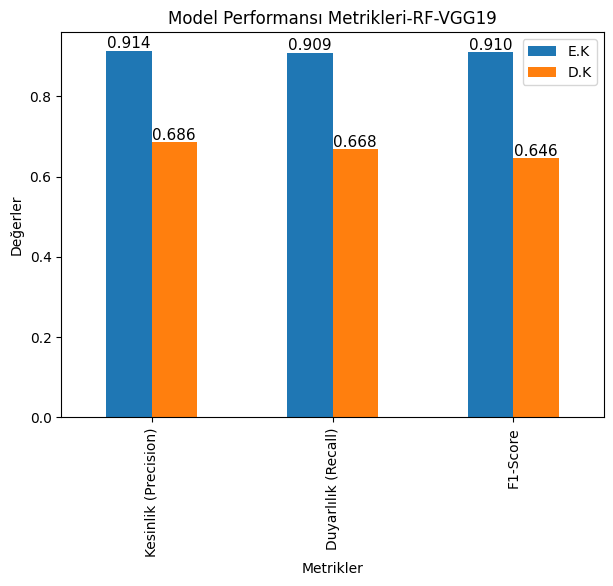

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri bir sözlük olarak tanımla
data = {
    "Metrikler": ["Kesinlik (Precision)", "Duyarlılık (Recall)", "F1-Score"],
    "Eğitim Kümesi": [0.9141550216415399, 0.908842608398771, 0.909609372222196],
    "Doğrulama Kümesi": [0.6856208025211659, 0.6684856753069577, 0.6460425559685457]
}

# Verileri bir DataFrame'e dönüştür
df = pd.DataFrame(data)

# Grafik oluştur
plt.figure(figsize=(7, 5))

# Çubuk grafik çiz
ax = df.plot(x="Metrikler", kind="bar", ax=plt.gca())

# Çubukların üzerine değerleri yaz
for p in ax.patches:
    ax.annotate("{:.3f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Metrikler")
plt.ylabel("Değerler")
plt.title("Model Performansı Metrikleri-RF-VGG19")

# Lejantı özelleştir
plt.legend(labels=['E.K', 'D.K'])

# Grafik penceresini göster
plt.show()

In [ ]:
train_f1_per_class = f1_score(y_train, train_predictions, average=None)
val_f1_per_class = f1_score(y_val, val_predictions, average=None)

for i, f1_train in enumerate(train_f1_per_class):
    print("Sınıf {} için eğitim kümesi F1-score: {:.4f}".format(i, f1_train))

for i, f1_val in enumerate(val_f1_per_class):
    print("Sınıf {} için doğrulama kümesi F1-score: {:.4f}".format(i, f1_val))

Sınıf 0 için eğitim kümesi F1-score: 0.9137
Sınıf 1 için eğitim kümesi F1-score: 0.9260
Sınıf 2 için eğitim kümesi F1-score: 0.8638
Sınıf 3 için eğitim kümesi F1-score: 0.9781
Sınıf 4 için eğitim kümesi F1-score: 0.9718
Sınıf 0 için doğrulama kümesi F1-score: 0.8783
Sınıf 1 için doğrulama kümesi F1-score: 0.3566
Sınıf 2 için doğrulama kümesi F1-score: 0.5971
Sınıf 3 için doğrulama kümesi F1-score: 0.0952
Sınıf 4 için doğrulama kümesi F1-score: 0.1600


In [ ]:
train_accuracy = rf.score(X_train, y_train)
val_accuracy = rf.score(X_val, y_val)
print("Eğitim kümesi doğruluğu:", train_accuracy)
print("Doğrulama kümesi doğruluğu:", val_accuracy)

Eğitim kümesi doğruluğu: 0.908842608398771
Doğrulama kümesi doğruluğu: 0.6684856753069577


In [ ]:
train_accuracy = svm.score(X_train, y_train)
val_accuracy = svm.score(X_val, y_val)
print("Eğitim kümesi doğruluğu:", train_accuracy)
print("Doğrulama kümesi doğruluğu:", val_accuracy)

Eğitim kümesi doğruluğu: 0.9279617616934107
Doğrulama kümesi doğruluğu: 0.7394270122783083


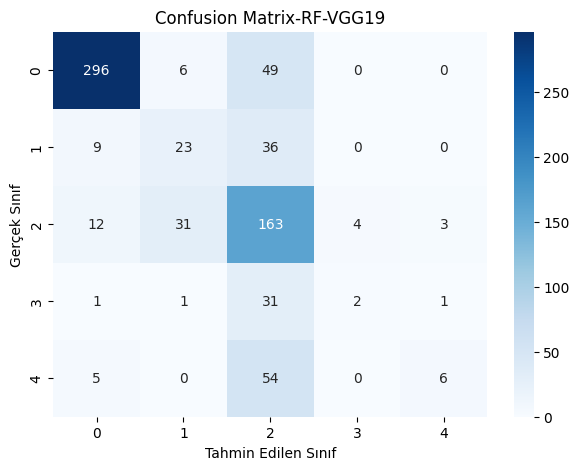

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix-RF-VGG19")
plt.show()


**2-KNN Algoritması**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Eğitim ve doğrulama kümesinde tahmin yapma
train_predictions = knn.predict(X_train)
val_predictions = knn.predict(X_val)

# Eğitim ve doğrulama kümesinde metrikleri hesaplama
train_precision = precision_score(y_train, train_predictions, average='weighted')
val_precision = precision_score(y_val, val_predictions, average='weighted')

train_recall = recall_score(y_train, train_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')

train_f1 = f1_score(y_train, train_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Eğitim kümesi kesinlik (precision):", train_precision)
print("Doğrulama kümesi kesinlik (precision):", val_precision)
print("Eğitim kümesi duyarlılık (recall):", train_recall)
print("Doğrulama kümesi duyarlılık (recall):", val_recall)
print("Eğitim kümesi F1-score:", train_f1)
print("Doğrulama kümesi F1-score:", val_f1)

Eğitim kümesi kesinlik (precision): 0.9932271849313447
Doğrulama kümesi kesinlik (precision): 0.6439907693122497
Eğitim kümesi duyarlılık (recall): 0.9931717309662
Doğrulama kümesi duyarlılık (recall): 0.6753069577080492
Eğitim kümesi F1-score: 0.9931424178742089
Doğrulama kümesi F1-score: 0.6308965251560568


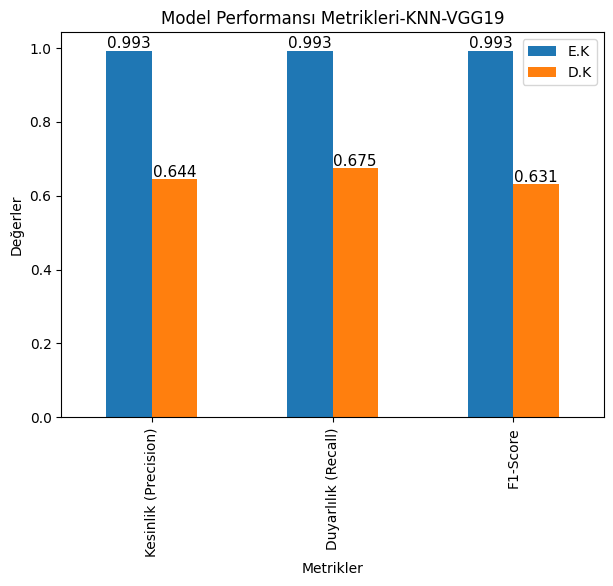

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri bir sözlük olarak tanımla
data = {
    "Metrikler": ["Kesinlik (Precision)", "Duyarlılık (Recall)", "F1-Score"],
    "Eğitim Kümesi": [0.9932271849313447, 0.9931717309662, 0.9931424178742089],
    "Doğrulama Kümesi": [0.6439907693122497, 0.6753069577080492, 0.6308965251560568]
}

# Verileri bir DataFrame'e dönüştür
df = pd.DataFrame(data)

# Grafik oluştur
plt.figure(figsize=(7, 5))

# Çubuk grafik çiz
ax = df.plot(x="Metrikler", kind="bar", ax=plt.gca())

# Çubukların üzerine değerleri yaz
for p in ax.patches:
    ax.annotate("{:.3f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Metrikler")
plt.ylabel("Değerler")
plt.title("Model Performansı Metrikleri-KNN-VGG19")

# Lejantı özelleştir
plt.legend(labels=['E.K', 'D.K'])

# Grafik penceresini göster
plt.show()

In [ ]:
train_f1_per_class = f1_score(y_train, train_predictions, average=None)
val_f1_per_class = f1_score(y_val, val_predictions, average=None)

for i, f1_train in enumerate(train_f1_per_class):
    print("Sınıf {} için eğitim kümesi F1-score: {:.4f}".format(i, f1_train))

for i, f1_val in enumerate(val_f1_per_class):
    print("Sınıf {} için doğrulama kümesi F1-score: {:.4f}".format(i, f1_val))

Sınıf 0 için eğitim kümesi F1-score: 0.9990
Sınıf 1 için eğitim kümesi F1-score: 0.9883
Sınıf 2 için eğitim kümesi F1-score: 0.9918
Sınıf 3 için eğitim kümesi F1-score: 0.9776
Sınıf 4 için eğitim kümesi F1-score: 0.9779
Sınıf 0 için doğrulama kümesi F1-score: 0.8815
Sınıf 1 için doğrulama kümesi F1-score: 0.1087
Sınıf 2 için doğrulama kümesi F1-score: 0.6359
Sınıf 3 için doğrulama kümesi F1-score: 0.0909
Sınıf 4 için doğrulama kümesi F1-score: 0.1067


In [ ]:
train_accuracy = knn.score(X_train, y_train)
val_accuracy = knn.score(X_val, y_val)
print("Eğitim kümesi doğruluğu:", train_accuracy)
print("Doğrulama kümesi doğruluğu:", val_accuracy)

Eğitim kümesi doğruluğu: 0.9931717309662
Doğrulama kümesi doğruluğu: 0.6753069577080492


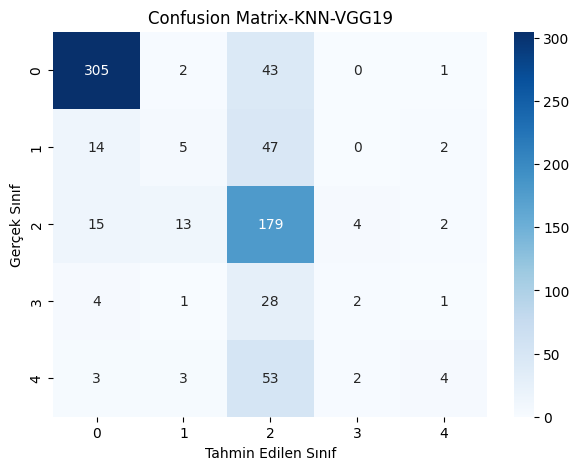

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix-KNN-VGG19")
plt.show()

**3-NB Algoritması**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Eğitim ve doğrulama kümesinde tahmin yapma
train_predictions = nb.predict(X_train)
val_predictions = nb.predict(X_val)

# Eğitim ve doğrulama kümesinde metrikleri hesaplama
train_precision = precision_score(y_train, train_predictions, average='weighted')
val_precision = precision_score(y_val, val_predictions, average='weighted')

train_recall = recall_score(y_train, train_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')

train_f1 = f1_score(y_train, train_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Eğitim kümesi kesinlik (precision):", train_precision)
print("Doğrulama kümesi kesinlik (precision):", val_precision)
print("Eğitim kümesi duyarlılık (recall):", train_recall)
print("Doğrulama kümesi duyarlılık (recall):", val_recall)
print("Eğitim kümesi F1-score:", train_f1)
print("Doğrulama kümesi F1-score:", val_f1)

Eğitim kümesi kesinlik (precision): 0.9895765482990946
Doğrulama kümesi kesinlik (precision): 0.5597480755966721
Eğitim kümesi duyarlılık (recall): 0.9894161829976101
Doğrulama kümesi duyarlılık (recall): 0.5811732605729877
Eğitim kümesi F1-score: 0.9894245910865741
Doğrulama kümesi F1-score: 0.5307101042194161


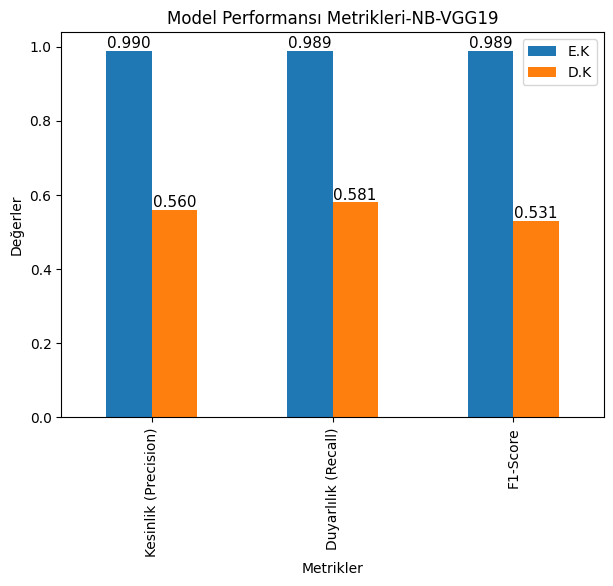

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri bir sözlük olarak tanımla
data = {
    "Metrikler": ["Kesinlik (Precision)", "Duyarlılık (Recall)", "F1-Score"],
    "Eğitim Kümesi": [0.9895765482990946, 0.9894161829976101, 0.98942459108657],
    "Doğrulama Kümesi": [0.5597480755966721, 0.5811732605729877, 0.5307101042194161]
}

# Verileri bir DataFrame'e dönüştür
df = pd.DataFrame(data)

# Grafik oluştur
plt.figure(figsize=(7, 5))

# Çubuk grafik çiz
ax = df.plot(x="Metrikler", kind="bar", ax=plt.gca())

# Çubukların üzerine değerleri yaz
for p in ax.patches:
    ax.annotate("{:.3f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Metrikler")
plt.ylabel("Değerler")
plt.title("Model Performansı Metrikleri-NB-VGG19")

# Lejantı özelleştir
plt.legend(labels=['E.K', 'D.K'])

# Grafik penceresini göster
plt.show()

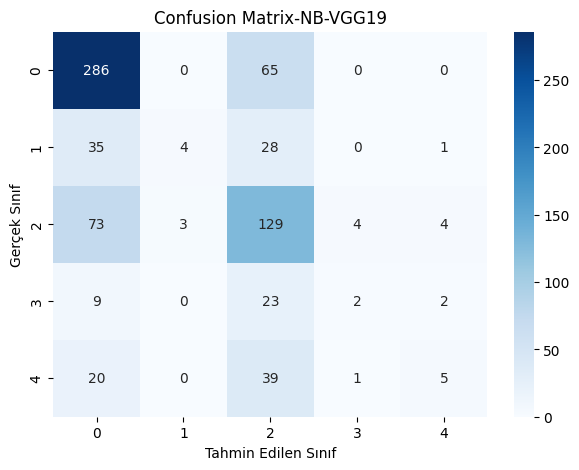

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = nb.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix-NB-VGG19")
plt.show()

**4-AdaBoost Algoritması**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, algorithm ='SAMME',random_state=42)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100,
                   random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Eğitim ve doğrulama kümesinde tahmin yapma
train_predictions = ada.predict(X_train)
val_predictions = ada.predict(X_val)

# Eğitim ve doğrulama kümesinde metrikleri hesaplama
train_precision = precision_score(y_train, train_predictions, average='weighted')
val_precision = precision_score(y_val, val_predictions, average='weighted')

train_recall = recall_score(y_train, train_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')

train_f1 = f1_score(y_train, train_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Eğitim kümesi kesinlik (precision):", train_precision)
print("Doğrulama kümesi kesinlik (precision):", val_precision)
print("Eğitim kümesi duyarlılık (recall):", train_recall)
print("Doğrulama kümesi duyarlılık (recall):", val_recall)
print("Eğitim kümesi F1-score:", train_f1)
print("Doğrulama kümesi F1-score:", val_f1)

Eğitim kümesi kesinlik (precision): 0.5786470461087349
Doğrulama kümesi kesinlik (precision): 0.5685816363241302
Eğitim kümesi duyarlılık (recall): 0.6858996244452031
Doğrulama kümesi duyarlılık (recall): 0.684856753069577
Eğitim kümesi F1-score: 0.6138650580727285
Doğrulama kümesi F1-score: 0.6099642590115293


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


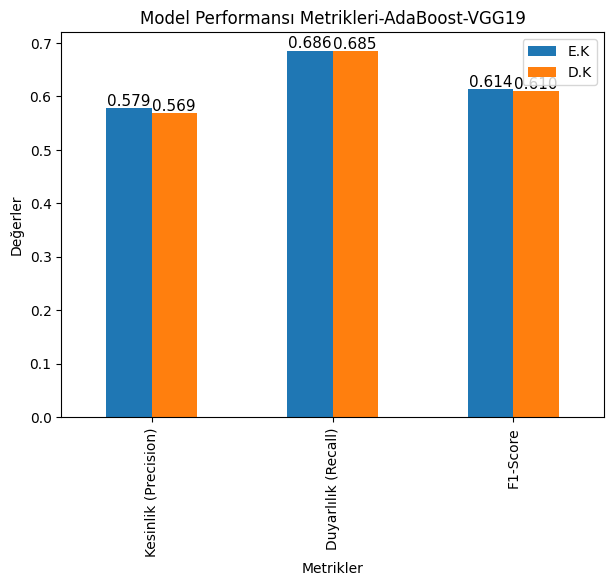

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri bir sözlük olarak tanımla
data = {
    "Metrikler": ["Kesinlik (Precision)", "Duyarlılık (Recall)", "F1-Score"],
    "Eğitim Kümesi": [0.5786470461087349, 0.6858996244452031, 0.6138650580727285],
    "Doğrulama Kümesi": [0.5685816363241302, 0.684856753069577, 0.6099642590115293]
}

# Verileri bir DataFrame'e dönüştür
df = pd.DataFrame(data)

# Grafik oluştur
plt.figure(figsize=(7, 5))

# Çubuk grafik çiz
ax = df.plot(x="Metrikler", kind="bar", ax=plt.gca())

# Çubukların üzerine değerleri yaz
for p in ax.patches:
    ax.annotate("{:.3f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Metrikler")
plt.ylabel("Değerler")
plt.title("Model Performansı Metrikleri-AdaBoost-VGG19")

# Lejantı özelleştir
plt.legend(labels=['E.K', 'D.K'])

# Grafik penceresini göster
plt.show()

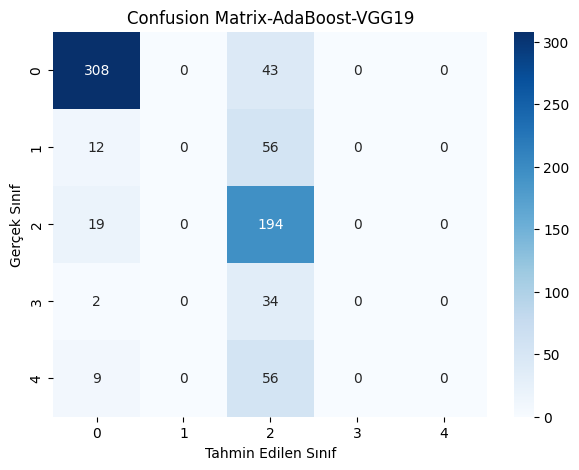

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = ada.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix-AdaBoost-VGG19")
plt.show()

**5-SVM Algoritması**

In [ ]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Eğitim ve doğrulama kümesinde tahmin yapma
train_predictions = svm.predict(X_train)
val_predictions = svm.predict(X_val)

# Eğitim ve doğrulama kümesinde metrikleri hesaplama
train_precision = precision_score(y_train, train_predictions, average='weighted')
val_precision = precision_score(y_val, val_predictions, average='weighted')

train_recall = recall_score(y_train, train_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')

train_f1 = f1_score(y_train, train_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Eğitim kümesi kesinlik (precision):", train_precision)
print("Doğrulama kümesi kesinlik (precision):", val_precision)
print("Eğitim kümesi duyarlılık (recall):", train_recall)
print("Doğrulama kümesi duyarlılık (recall):", val_recall)
print("Eğitim kümesi F1-score:", train_f1)
print("Doğrulama kümesi F1-score:", val_f1)

Eğitim kümesi kesinlik (precision): 0.9351219840517185
Doğrulama kümesi kesinlik (precision): 0.7001248025229485
Eğitim kümesi duyarlılık (recall): 0.9279617616934107
Doğrulama kümesi duyarlılık (recall): 0.7394270122783083
Eğitim kümesi F1-score: 0.9257666954691
Doğrulama kümesi F1-score: 0.664552495256699


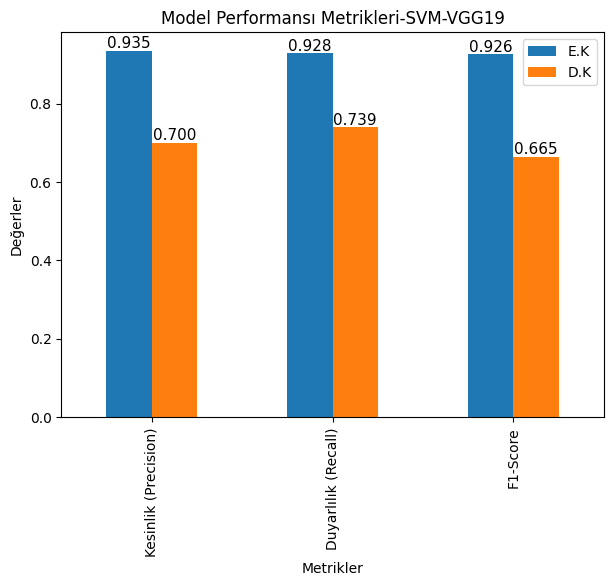

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri bir sözlük olarak tanımla
data = {
    "Metrikler": ["Kesinlik (Precision)", "Duyarlılık (Recall)", "F1-Score"],
    "Eğitim Kümesi": [0.9351219840517185, 0.9279617616934107, 0.9257666954691],
    "Doğrulama Kümesi": [0.7001248025229485, 0.7394270122783083, 0.664552495256699]
}

# Verileri bir DataFrame'e dönüştür
df = pd.DataFrame(data)

# Grafik oluştur
plt.figure(figsize=(7, 5))

# Çubuk grafik çiz
ax = df.plot(x="Metrikler", kind="bar", ax=plt.gca())

# Çubukların üzerine değerleri yaz
for p in ax.patches:
    ax.annotate("{:.3f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Metrikler")
plt.ylabel("Değerler")
plt.title("Model Performansı Metrikleri-SVM-VGG19")

# Lejantı özelleştir
plt.legend(labels=['E.K', 'D.K'])

# Grafik penceresini göster
plt.show()

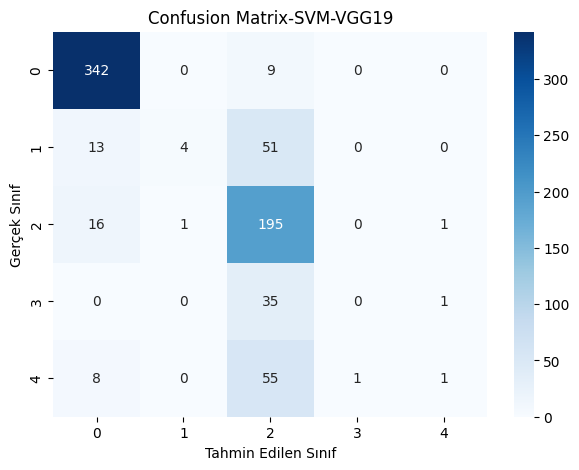

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = svm.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix-SVM-VGG19")
plt.show()